# This notebook was used to plot results.

In [1]:
import numpy as np
import csv
import os
import copy
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'sans-serif',
        'size'   : 18}
matplotlib.rc('font', **font)

list_color = [ 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r',
              'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',
              'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
              'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
              'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
              'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
              'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples',
              'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r',
              'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1',
              'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r',
              'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr',
              'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r',
              'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r',
              'cividis', "cividis_r", "cool", "cool_r", "coolwarm", "coolwarm_r", "copper", "copper_r",
              'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', "gist_gray",
              'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', "gist_ncar_r", "gist_rainbow",
              'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', "gist_yarg_r", "gnuplot", 
              'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', "hot_r", 'hsv', 'hsv_r', "inferno",
              'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', "nipy_spectral_r", "ocean",
              'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', "rainbow", "rainbow_r",
              'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', "tab10_r", "tab20",
              'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
              'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

In [2]:
def result_array(results, key='train_loss'):
    
    for nb_run in range(1, 1 + len(results.keys())):
        if nb_run ==1:
            output =  np.array(results['run_nb_' + str(nb_run)][key])
        else:
            output = np.c_[output, np.array(results['run_nb_' + str(nb_run)][key])]
    return output

In [3]:
import glob
root = '../logs//ReLU//'
save_dir_plots = '../plots//ReLU//'

csv_files = [f for f in glob.glob(root + "*.csv")]
csv_files.sort()
csv_name_list = [file.split('/')[-1][:-4] for file in csv_files]


In [4]:
lr_arr = np.zeros(len(csv_name_list))
batch_size_arr = np.zeros(len(csv_name_list))

for count in range(len(csv_name_list)):
    _, lr, _, batch_size = csv_name_list[count].split('-')
    lr_arr[count] = (float(lr))
    batch_size_arr[count] = (float(batch_size))


In [5]:
indices_batch_size_1 = np.where(batch_size_arr==1)[0]
indices_batch_size_5 = np.where(batch_size_arr==5)[0]
indices_batch_size_10 = np.where(batch_size_arr==10)[0]
indices_batch_size_20 = np.where(batch_size_arr==20)[0]
indices_batch_size_50 = np.where(batch_size_arr==50)[0]
indices_batch_size_100 = np.where(batch_size_arr==100)[0]
indices_batch_size_200 = np.where(batch_size_arr==200)[0]


In [6]:
def result_dict(csv_files, index):    
    results = {}
    keys = ['Activation func.', 'learning_rate', 'batch_size', 'epoch', 
     'train_loss', 'test_loss', 'train_acc', 'test_acc']
    for run_number in range(1, 10 + 1):
        results['run_nb_' + str(run_number)] = {}
        for key in keys:
            results['run_nb_' + str(run_number)][key] = []

    with open(csv_files[index]) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        run_number = 1
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                results['run_nb_' + row[8]]['Activation func.'].append(row[0])
                results['run_nb_' + row[8]]['learning_rate'].append(float(row[1]))
                results['run_nb_' + row[8]]['batch_size'].append(int(row[2]))
                results['run_nb_' + row[8]]['epoch'].append(int(row[3]))
                results['run_nb_' + row[8]]['train_loss'].append(float(row[4]))
                results['run_nb_' + row[8]]['test_loss'].append(float(row[5]))
                results['run_nb_' + row[8]]['train_acc'].append(float(row[6]))
                results['run_nb_' + row[8]]['test_acc'].append(float(row[7]))
                line_count += 1
    return results

In [7]:
def plot_loss_lr(indices_batch_size,batch_size, lr_arr=lr_arr):
    
    name_save_plot = 'loss_batch' + str(batch_size) 
    # sorting according to learning rate
    color = ['dimgray', 'm', 'deepskyblue', 'r', 'chartreuse']
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    fig.subplots_adjust(hspace=20)
    min_test_loss_lr = np.zeros(len(indices_batch_size))
    std_test_loss_lr = np.zeros(len(indices_batch_size))
    min_test_acc_lr = np.zeros(len(indices_batch_size))
    std_test_acc_lr = np.zeros(len(indices_batch_size))
    min_train_loss_lr = np.zeros(len(indices_batch_size))
    std_train_loss_lr = np.zeros(len(indices_batch_size))
    min_train_acc_lr = np.zeros(len(indices_batch_size))
    std_train_acc_lr = np.zeros(len(indices_batch_size))
    for ind, batch_index in enumerate(indices_batch_size):
        results = result_dict(csv_files, batch_index)

        train_loss = result_array(results, 'train_loss')
        test_loss = result_array(results, 'test_loss')
        means_loss_train = train_loss.mean(axis=1)
        stds_loss_train = train_loss.std(axis=1)
            
        train_acc = result_array(results, 'train_acc')
        test_acc = result_array(results, 'test_acc')
        means_acc_train = train_acc.mean(axis=1)
        stds_acc_train = train_acc.std(axis=1)


        ax1.plot(means_loss_train, color=color[ind], label='train')
        ax1.fill_between(range(len(means_loss_train)),
                         means_loss_train-stds_loss_train,means_loss_train+stds_loss_train,alpha=.2, color=color[ind])
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_title('Train data')

        means_loss_test = test_loss.mean(axis=1)
        stds_loss_test = test_loss.std(axis=1)
        means_acc_test = test_acc.mean(axis=1)
        stds_acc_test = test_acc.std(axis=1)
        
        ax2.plot(means_loss_test, color=color[ind], label='lr: {:.1e}'.format(lr_arr[ind]))
        ax2.fill_between(range(len(means_loss_test)),
                         means_loss_test-stds_loss_test,means_loss_test+stds_loss_test,alpha=.2, color=color[ind])
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend(bbox_to_anchor=(1,0.5))
        ax2.set_title('Test data')
        #plt.legend()
        #ax = plt.gca()
        #ax.set_facecolor((0.95, 0.95, 0.95))
        min_test_loss_lr[ind] = np.min(means_loss_test)
        std_test_loss_lr[ind] = stds_loss_test[np.argmin(means_loss_test)]
        min_test_acc_lr[ind] = means_acc_test[np.argmin(means_loss_test)]
        std_test_acc_lr[ind] = stds_acc_test[np.argmin(means_loss_test)]
        min_train_loss_lr[ind] = means_loss_train[np.argmin(means_loss_test)]
        std_train_loss_lr[ind] = stds_loss_train[np.argmin(means_loss_test)]
        min_train_acc_lr[ind] = means_acc_test[np.argmin(means_loss_test)]
        std_train_acc_lr[ind] = stds_acc_train[np.argmin(means_loss_test)]
    if not os.path.exists(save_dir_plots):
        os.makedirs(save_dir_plots)
    plt.savefig(save_dir_plots + name_save_plot + '.pdf')
    plt.show()
    print('batch_size: {:d}, lr: {:.3f}'.format(batch_size, lr_arr[np.argmin(min_test_loss_lr)]))
    print('min mean test loss: {:.4f}, std test loss: {:.4f}, test acc: {:.2f}, std test acc: {:.2f}'.format(
                                                                      np.min(min_test_loss_lr),
                                                                      std_test_loss_lr[np.argmin(min_test_loss_lr)],
                                                                      min_test_acc_lr[np.argmin(min_test_loss_lr)],
                                                                      std_test_acc_lr[np.argmin(min_test_loss_lr)]
                                                                      ))
    print('train loss:\t   {:.4f},  std train loss: {:.4f}, train acc: {:.2f}, std train acc: {:.2f}'.format(
                                                                        min_train_loss_lr[np.argmin(min_test_loss_lr)],
                                                                        std_train_loss_lr[np.argmin(min_test_loss_lr)],
                                                                        min_train_acc_lr[np.argmin(min_test_loss_lr)],
                                                                      std_train_acc_lr[np.argmin(min_test_loss_lr)]))
    
    index_best_lr = indices_batch_size[np.argmin(min_test_loss_lr)]
    return index_best_lr, lr_arr[np.argmin(min_test_loss_lr)], np.min(min_test_loss_lr)

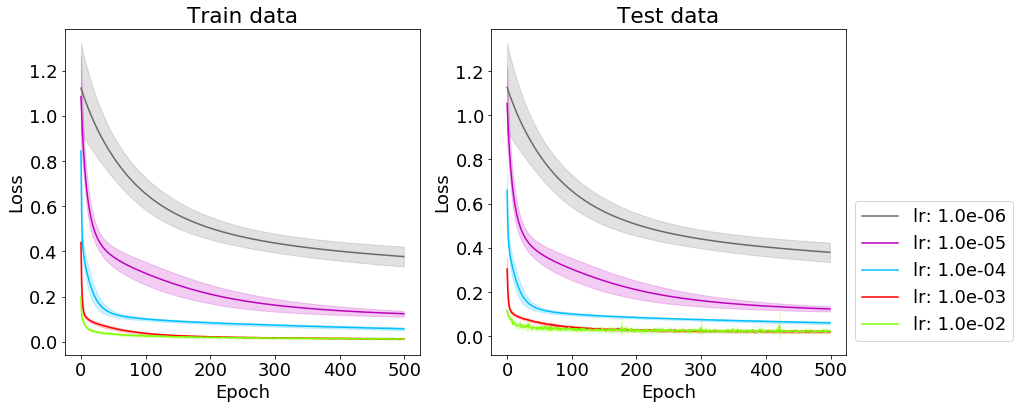

batch_size: 1, lr: 0.010
min mean test loss: 0.0189, std test loss: 0.0047, test acc: 98.82, std test acc: 0.29
train loss:	   0.0160,  std train loss: 0.0027, train acc: 98.82, std train acc: 0.19


In [8]:
index_best_lr_batch_1, lr_batch_1, min_test_loss_batch_1 = plot_loss_lr(indices_batch_size = indices_batch_size_1,
             batch_size=1,
             lr_arr=lr_arr[indices_batch_size_1])

results_best_lr_batch_1 = result_dict(csv_files, index_best_lr_batch_1)

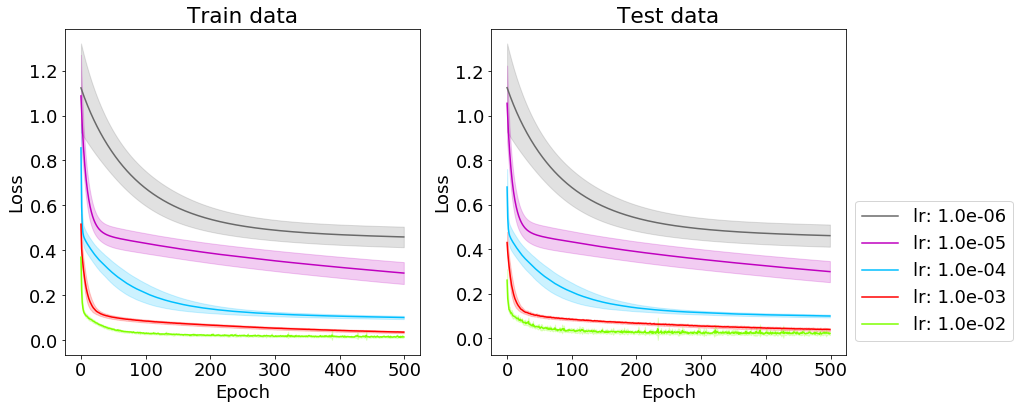

batch_size: 5, lr: 0.010
min mean test loss: 0.0187, std test loss: 0.0043, test acc: 98.88, std test acc: 0.27
train loss:	   0.0148,  std train loss: 0.0033, train acc: 98.88, std train acc: 0.23


In [9]:
index_best_lr_batch_5, lr_batch_5, min_test_loss_batch_5 = plot_loss_lr(indices_batch_size = indices_batch_size_5,
             batch_size=5,
             lr_arr=lr_arr[indices_batch_size_5])
results_best_lr_batch_5 = result_dict(csv_files, index_best_lr_batch_5)

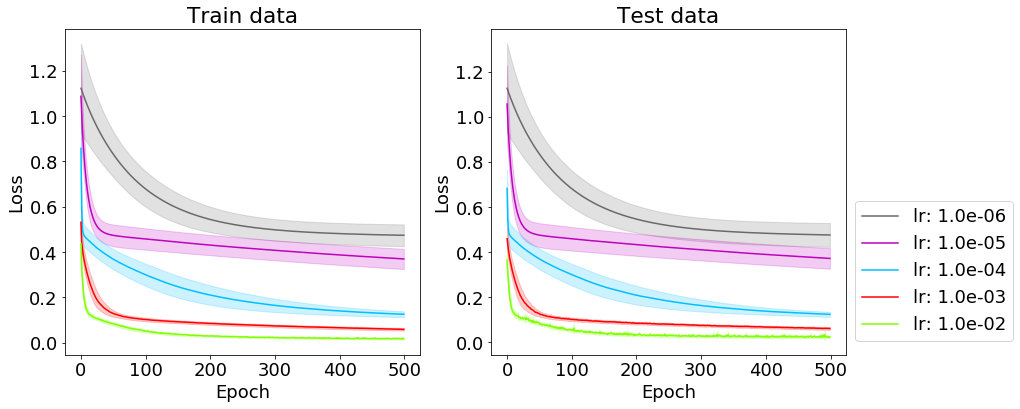

batch_size: 10, lr: 0.010
min mean test loss: 0.0220, std test loss: 0.0058, test acc: 98.61, std test acc: 0.44
train loss:	   0.0174,  std train loss: 0.0041, train acc: 98.61, std train acc: 0.29


In [10]:
index_best_lr_batch_10, lr_batch_10, min_test_loss_batch_10 = plot_loss_lr(indices_batch_size = indices_batch_size_10,
             batch_size=10,
             lr_arr=lr_arr[indices_batch_size_10])
results_best_lr_batch_10 = result_dict(csv_files, index_best_lr_batch_10)

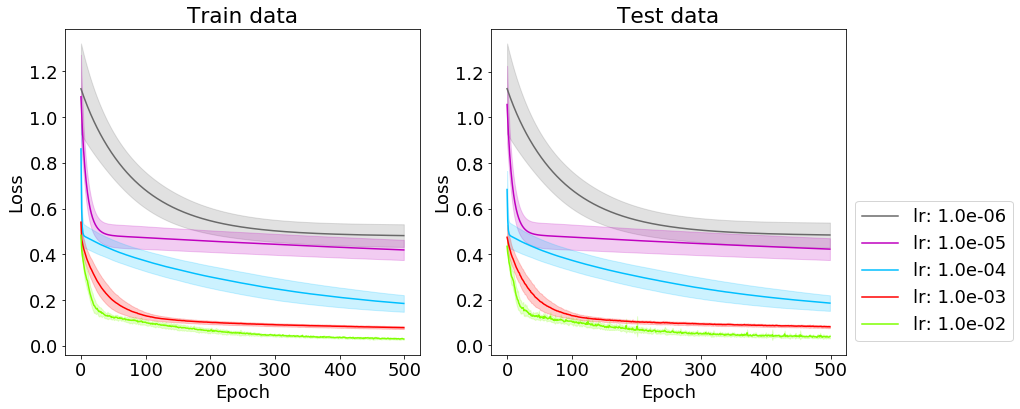

batch_size: 20, lr: 0.010
min mean test loss: 0.0339, std test loss: 0.0037, test acc: 98.39, std test acc: 0.36
train loss:	   0.0313,  std train loss: 0.0028, train acc: 98.39, std train acc: 0.22


In [11]:
index_best_lr_batch_20, lr_batch_20, min_test_loss_batch_20 = plot_loss_lr(indices_batch_size = indices_batch_size_20,
             batch_size=20,
             lr_arr=lr_arr[indices_batch_size_20])
results_best_lr_batch_20 = result_dict(csv_files, index_best_lr_batch_20)

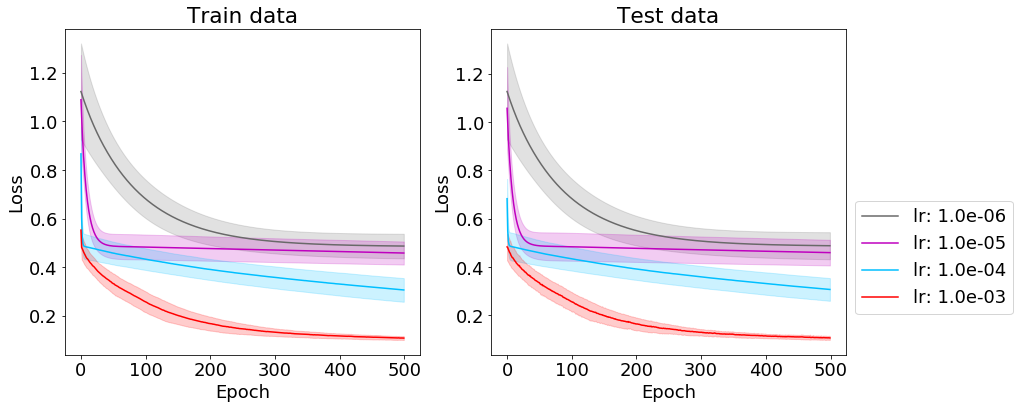

batch_size: 50, lr: 0.001
min mean test loss: 0.1071, std test loss: 0.0076, test acc: 96.28, std test acc: 0.79
train loss:	   0.1077,  std train loss: 0.0078, train acc: 96.28, std train acc: 0.63


In [12]:
index_best_lr_batch_50, lr_batch_50, min_test_loss_batch_50 = plot_loss_lr(indices_batch_size = indices_batch_size_50,
             batch_size=50,
             lr_arr=lr_arr[indices_batch_size_50])
results_best_lr_batch_50 = result_dict(csv_files, index_best_lr_batch_50)

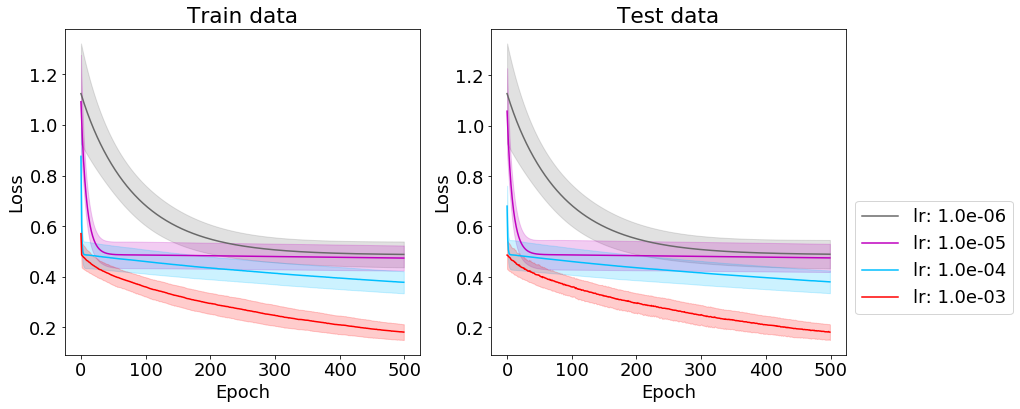

batch_size: 100, lr: 0.001
min mean test loss: 0.1812, std test loss: 0.0309, test acc: 90.48, std test acc: 3.62
train loss:	   0.1815,  std train loss: 0.0311, train acc: 90.48, std train acc: 3.67


In [13]:
index_best_lr_batch_100, lr_batch_100, min_test_loss_batch_100 = plot_loss_lr(indices_batch_size = indices_batch_size_100,
             batch_size=100,
             lr_arr=lr_arr[indices_batch_size_100])
results_best_lr_batch_100 = result_dict(csv_files, index_best_lr_batch_100)

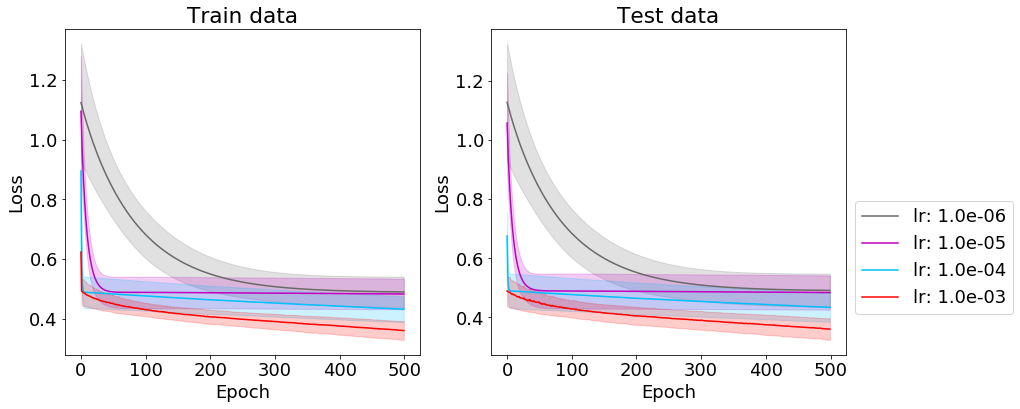

batch_size: 200, lr: 0.001
min mean test loss: 0.3598, std test loss: 0.0363, test acc: 72.76, std test acc: 5.87
train loss:	   0.3600,  std train loss: 0.0305, train acc: 72.76, std train acc: 4.06


In [14]:
index_best_lr_batch_200, lr_batch_200, min_test_loss_batch_200 = plot_loss_lr(indices_batch_size = indices_batch_size_200,
             batch_size=200,
             lr_arr=lr_arr[indices_batch_size_200])
results_best_lr_batch_200 = result_dict(csv_files, index_best_lr_batch_200)

# plot best of each batch_size

color map name:gist_heat
batch_size: 5, min mean test loss: 0.01870


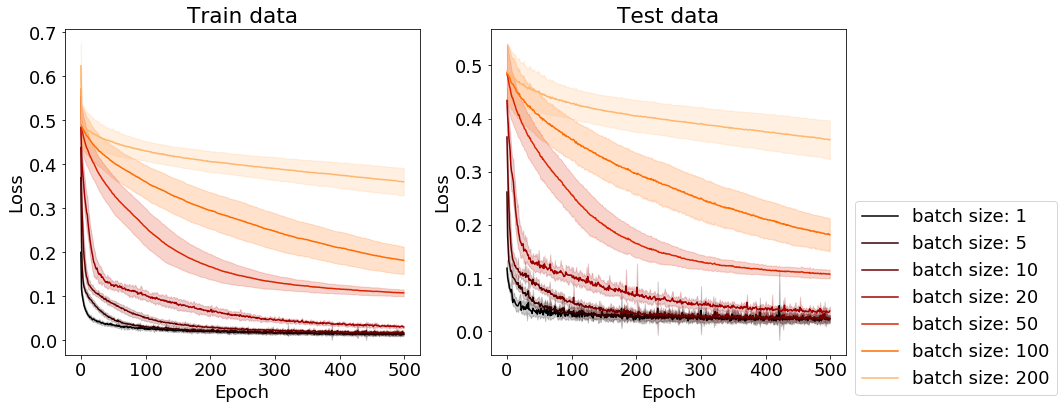

In [15]:
name_to_save_plot = 'best_losses_relu'
batch_size_list = [1, 5, 10, 20, 50, 100, 200] 
min_test_loss = np.zeros(len(batch_size_list))

list_color_selected = ['gist_heat']

for count in range(len(list_color_selected)):
    print('color map name:{:s}'.format(list_color_selected[count]))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    fig.subplots_adjust(hspace=20)
    cmap = matplotlib.cm.get_cmap(list_color_selected[count])
    for ind, batch_size in enumerate(batch_size_list):
            results = vars()['results_best_lr_batch_' + str(batch_size)]

            train_loss = result_array(results, 'train_loss')
            test_loss = result_array(results, 'test_loss')


            means_train = train_loss.mean(axis=1)
            stds_train = train_loss.std(axis=1)

            ax1.plot(means_train, color=cmap(ind / len(batch_size_list)), label='train')
            ax1.fill_between(range(len(means_train)),
                             means_train-stds_train,means_train+stds_train,alpha=.2, color=cmap(ind / len(batch_size_list)))
            ax1.set_xlabel('Epoch')
            ax1.set_ylabel('Loss')
            ax1.set_title('Train data')

            means_test = test_loss.mean(axis=1)
            stds_test = test_loss.std(axis=1)
            ax2.plot(means_test, color=cmap(ind / len(batch_size_list)), label='batch size: {:d}'.format(batch_size_list[ind]))
            ax2.fill_between(range(len(means_test)),
                             means_test-stds_test,means_test+stds_test,alpha=.2, color=cmap(ind / len(batch_size_list)))
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Loss')
            ax2.legend(bbox_to_anchor=(1,0.5))
            ax2.set_title('Test data')
            #plt.legend()
            #ax = plt.gca()
            #ax.set_facecolor((0.95, 0.95, 0.95))
            min_test_loss[ind] = np.min(means_test)
    print('batch_size: {:d}, min mean test loss: {:.5f}'.format(batch_size_list[np.argmin(min_test_loss)], np.min(min_test_loss)))
    if not os.path.exists(save_dir_plots):
        os.makedirs(save_dir_plots)
    plt.savefig(save_dir_plots + name_to_save_plot + '.pdf')
    plt.show()

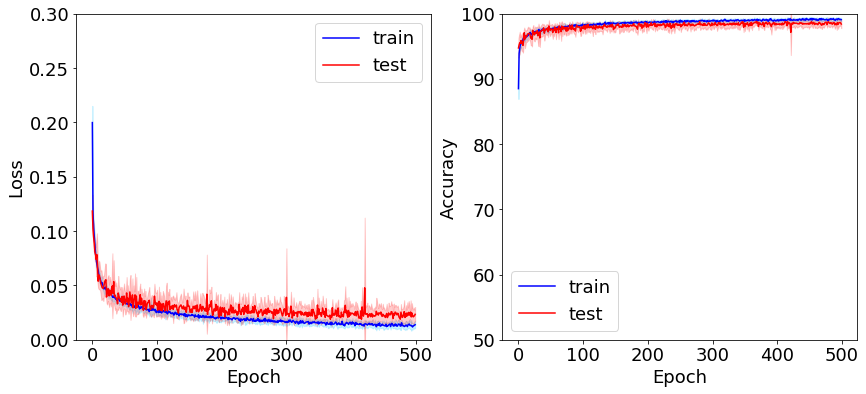

In [16]:
batch_size = 1
name_to_save_plot = 'best_loss_acc_train_test_relu'
results = vars()['results_best_lr_batch_' + str(batch_size)]

# loss
train_loss = result_array(results, 'train_loss')
test_loss = result_array(results, 'test_loss')
means_loss_train = train_loss.mean(axis=1)
stds_loss_train = train_loss.std(axis=1)
means_loss_test = test_loss.mean(axis=1)
stds_loss_test = test_loss.std(axis=1)

# accuracy
train_acc = result_array(results, 'train_acc')
test_acc = result_array(results, 'test_acc')
means_acc_train = train_acc.mean(axis=1)
stds_acc_train = train_acc.std(axis=1)
means_acc_test = test_acc.mean(axis=1)
stds_acc_test = test_acc.std(axis=1)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.subplots_adjust(hspace=20)
    
ax1.plot(means_loss_train, color='b', label='train')
ax1.fill_between(range(len(means_loss_train)),
                 means_loss_train-stds_loss_train,means_loss_train+stds_loss_train,alpha=.2, color='deepskyblue')
ax1.plot(means_loss_test, color='r', label='test')
ax1.fill_between(range(len(means_loss_test)),
                 means_loss_test-stds_loss_test,means_loss_test+stds_loss_test,alpha=.2, color='r')
ax1.legend(bbox_to_anchor=(1,1))
ax1.set_ylim([0,0.3])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

ax2.plot(means_acc_train, color='b', label='train')
ax2.fill_between(range(len(means_acc_train)),
                 means_acc_train-stds_acc_train,means_acc_train+stds_acc_train,alpha=.2, color='deepskyblue')
ax2.plot(means_acc_test, color='r', label='test')
ax2.fill_between(range(len(means_acc_test)),
                 means_acc_test-stds_acc_test,means_acc_test+stds_acc_test,alpha=.2, color='r')
ax2.legend()
ax2.set_ylim([50,100])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

if not os.path.exists(save_dir_plots):
    os.makedirs(save_dir_plots)
plt.savefig(save_dir_plots + name_to_save_plot + '.pdf')
plt.show()